In [1]:
####1.Import the necessary libraries if you are starting a new notebook.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

sns.set_style("whitegrid")

%matplotlib inline
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
####2.Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
###What should we do with the customer_id column?
### Drop or use as index
customer_df.set_index('Customer', inplace=True)



In [4]:
## Checking for unique values
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [5]:
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
customer_df.columns =[col_name.lower().replace(' ', '_') for col_name in customer_df.columns]
customer_df.columns #formatting the column names as necessary

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
#customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date']).dt.to_period('M')
#customer_df['effective_to_date'] ### code does not work when trying to generate line and cat plots

In [8]:
###3.Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
###numerical_df = customer_df.select_dtypes()
###categorical_df = customer_df.select_dtypes()

numerical_df= customer_df.select_dtypes(np.number)
categorical_df= customer_df.select_dtypes(np.object)

numerical_df.head() ###preview


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
categorical_df.head() ###preview

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
####4.Plot every categorical variable. What can you see in the plots? 
####Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the 
###column on the x-axis and an appropriate measure on the y-axis. 
####However, this time you will try a different plot. This time in each plot for the categorical variable you will have
####each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis


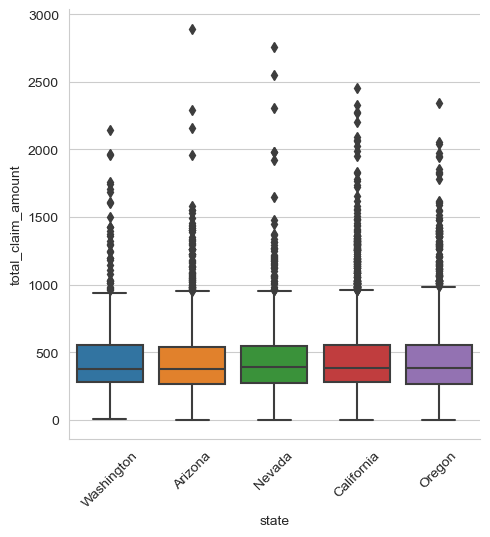

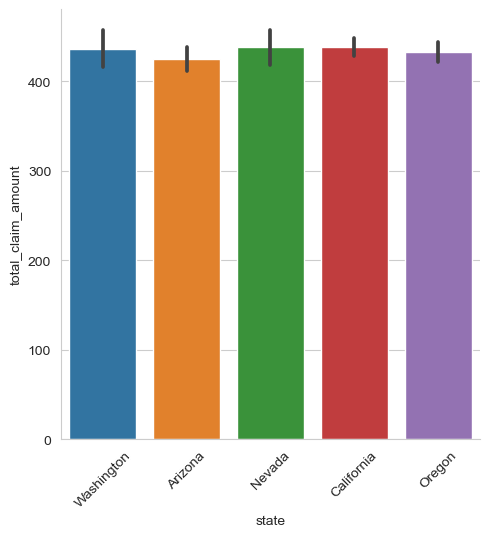

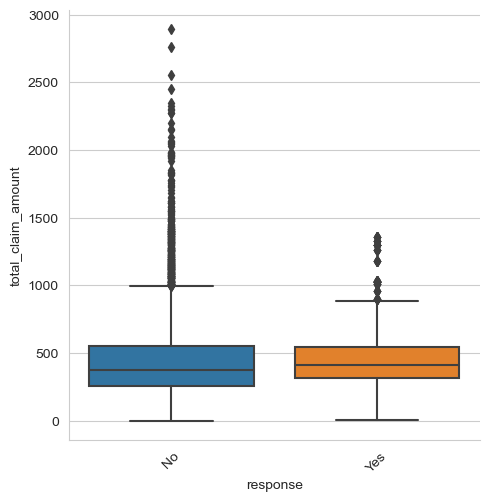

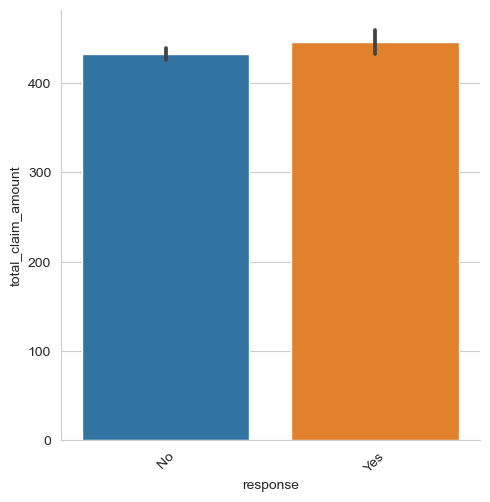

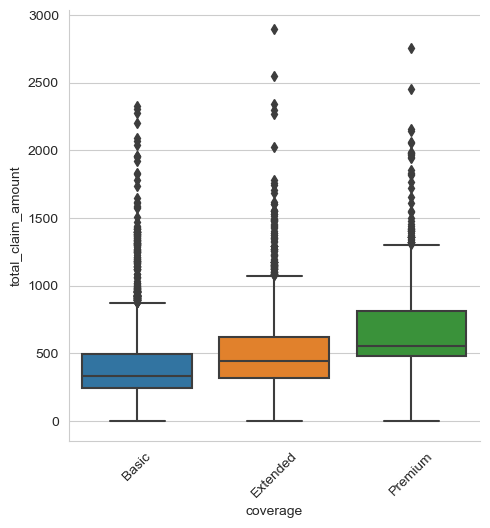

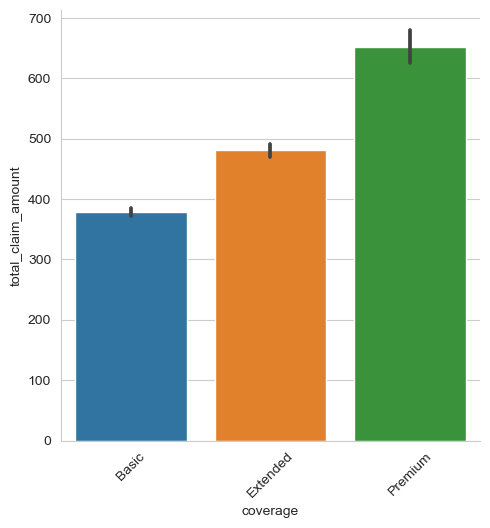

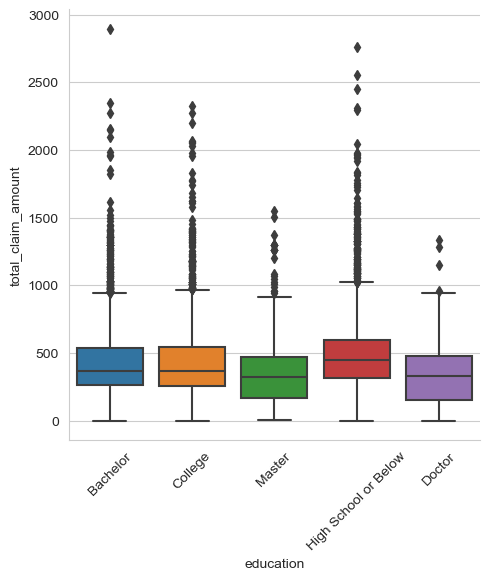

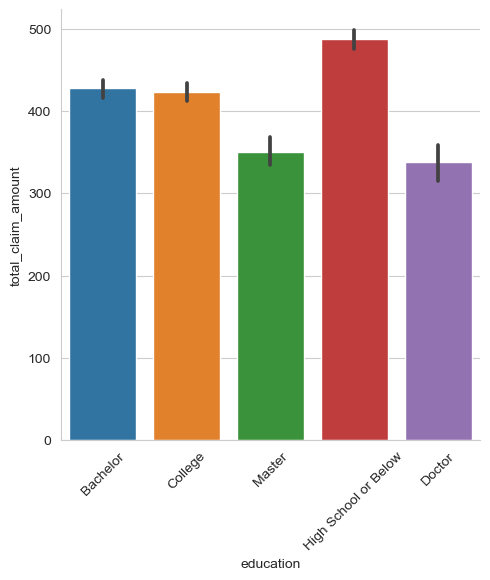

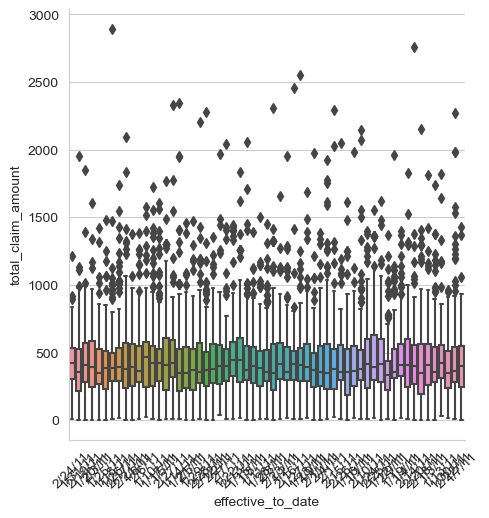

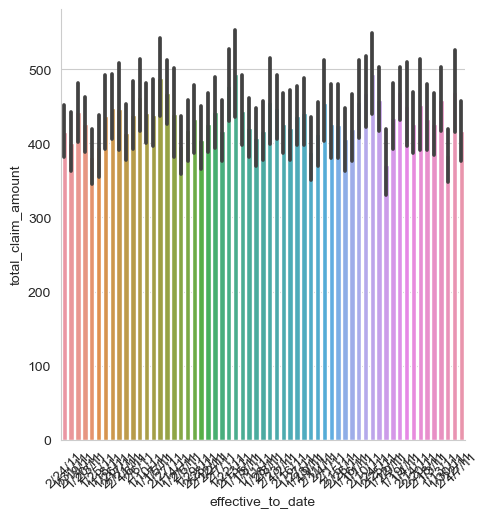

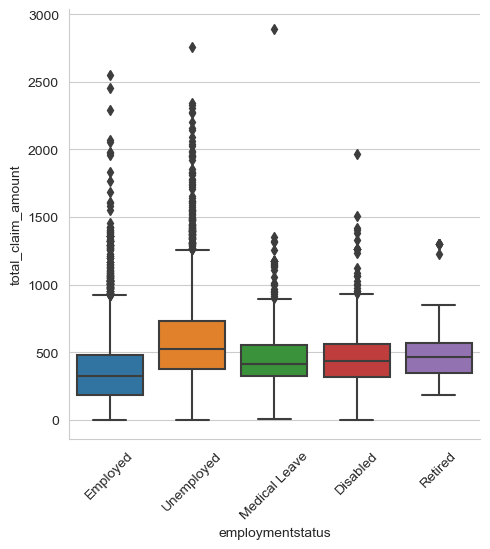

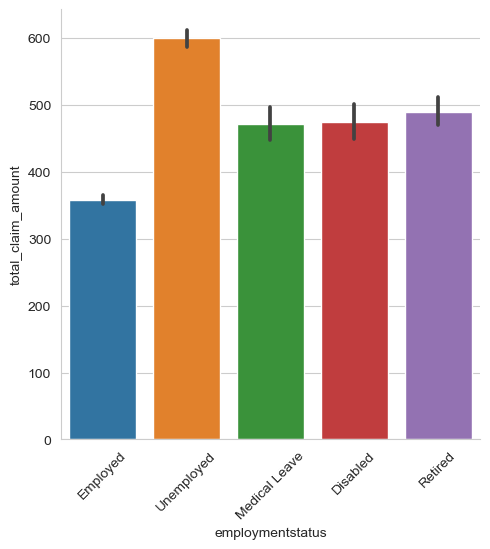

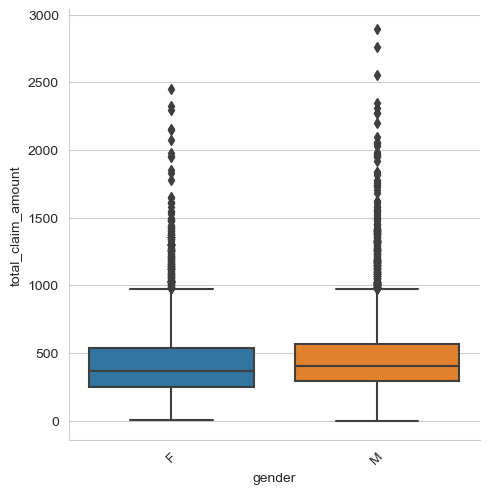

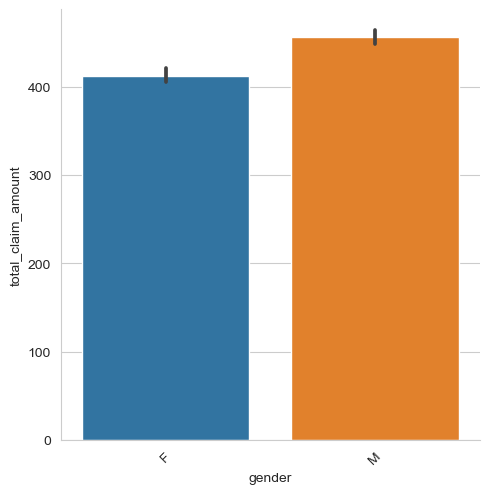

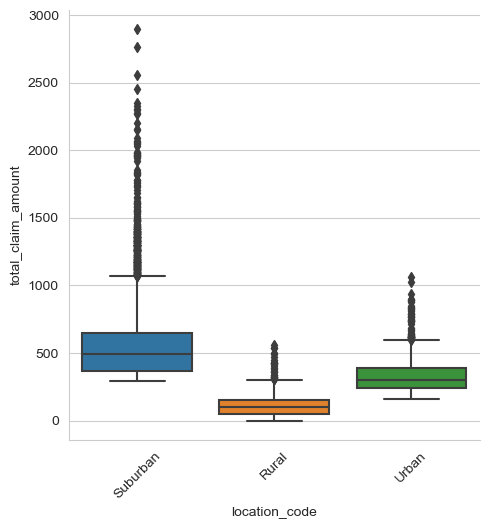

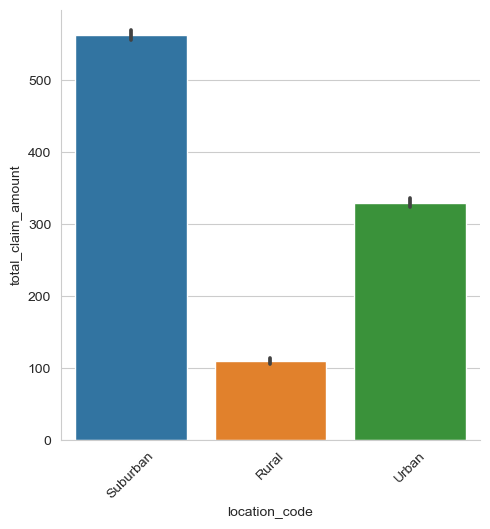

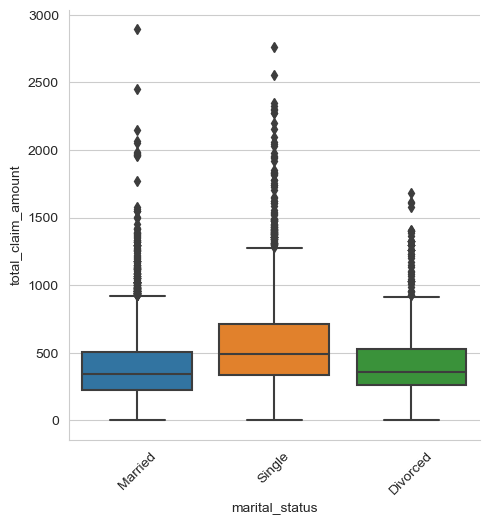

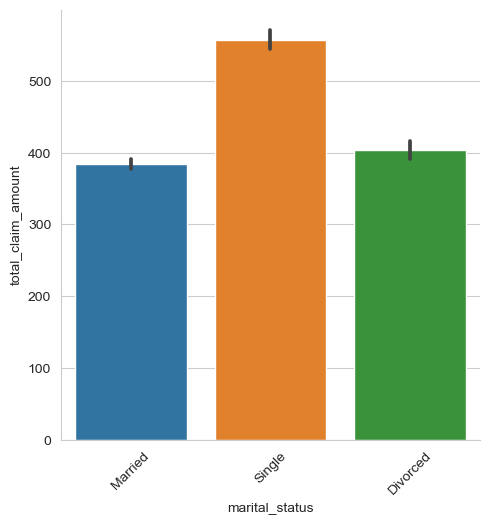

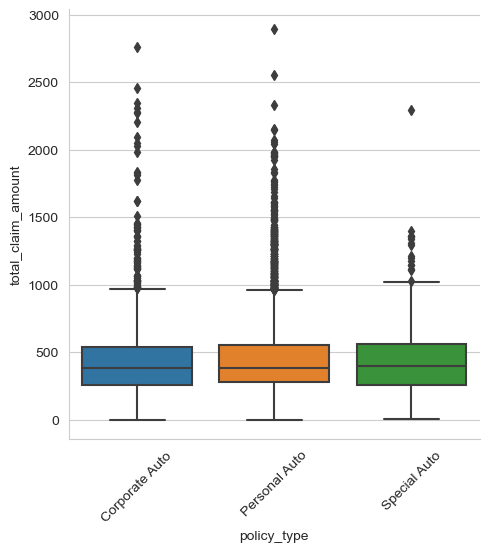

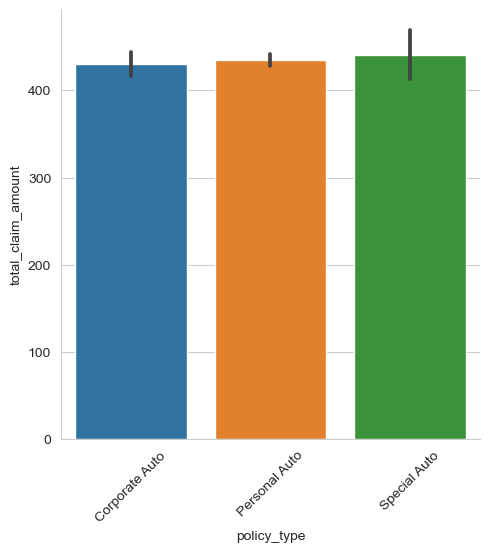

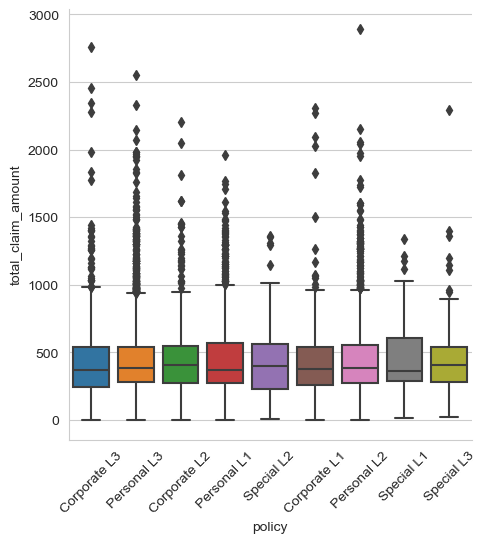

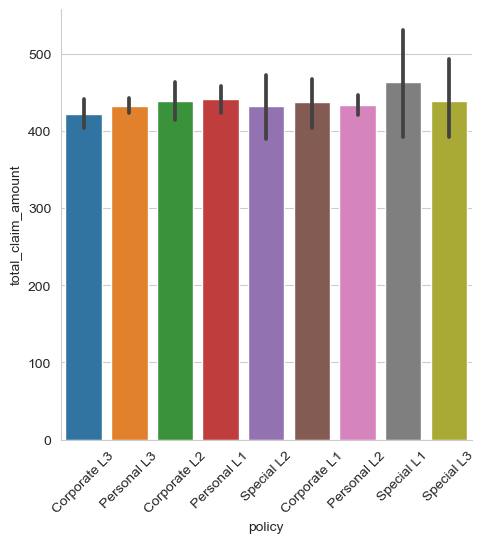

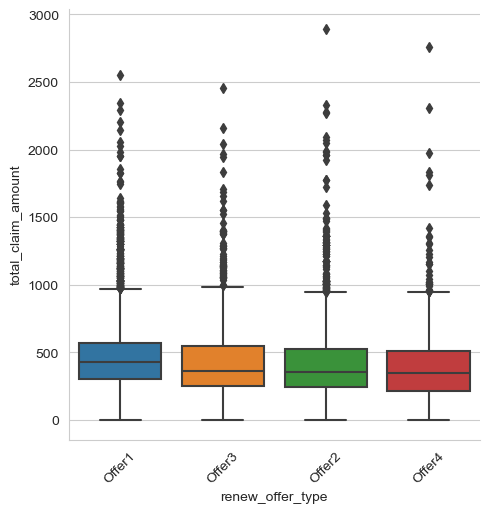

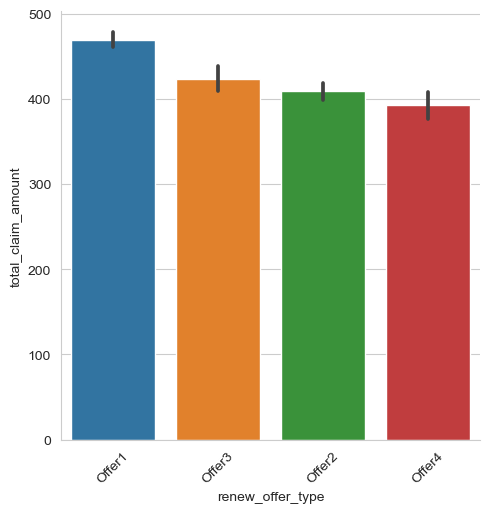

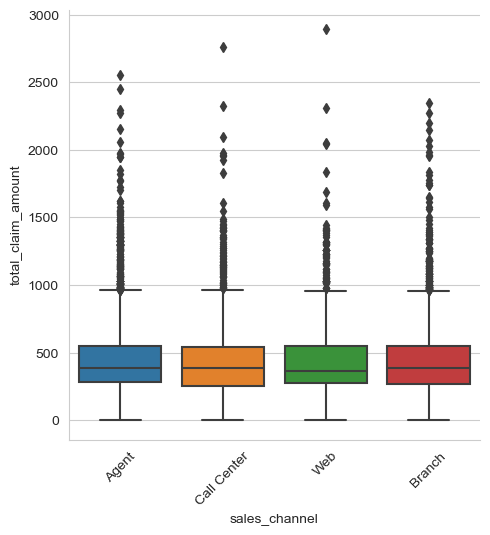

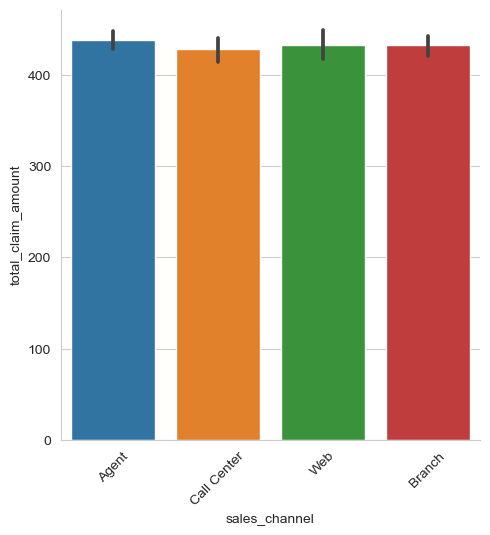

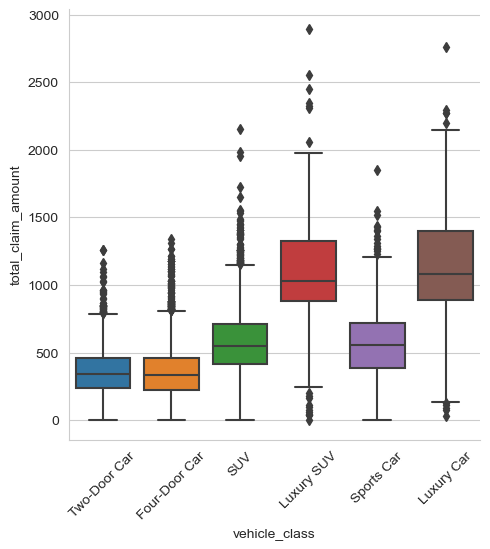

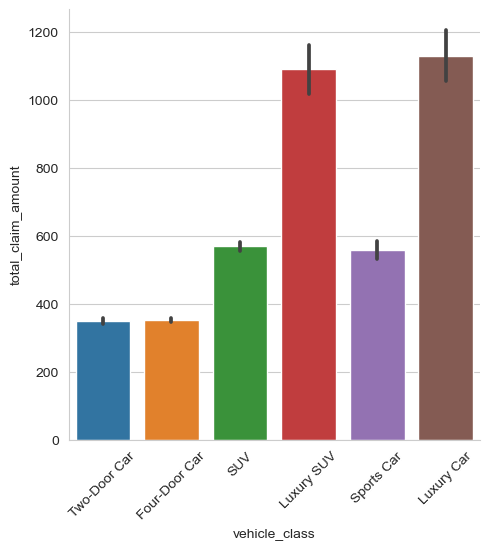

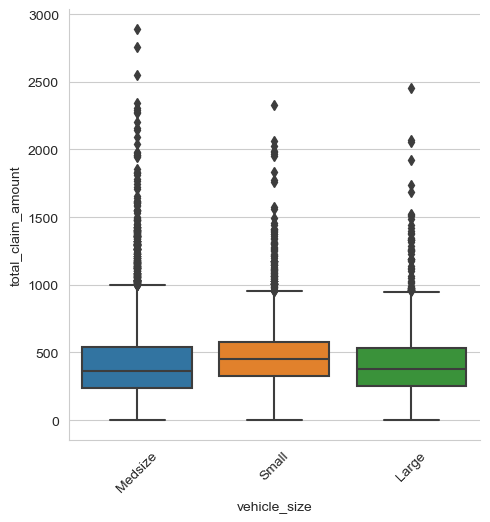

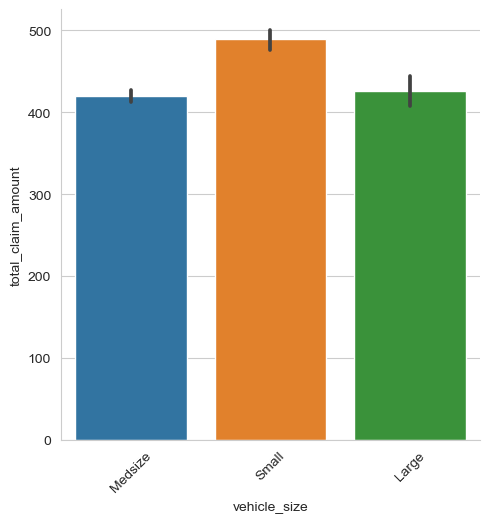

In [11]:
for col in customer_df.select_dtypes(np.object).columns:
    sns.catplot(x=col, y='total_claim_amount', data=customer_df, kind='box').set_xticklabels(rotation=45)
    sns.catplot(x=col, y='total_claim_amount', data=customer_df, kind='bar').set_xticklabels(rotation=45)
    plt.show()

 **`Plot Observations`**

For variables **state**, **response**, **gender**, **policy_type**, **policy**, **renew_offer_type**, **sales_channel** and **vehicle_size**, their unique categories have insignificant variation between each other in terms of explaining the total_claim_amount (Y-axis). Therefore, we can drop these variables from the model. However, the variation between categories in the **vehicle_size** variable is appears to be on the brink of being significant, and seems to be intrinsically related to **vehicle_class** (which actually has significant variation). As such, the variable **vehicle_size**  should be retained.

**`Dropping of Variables`**

In [12]:
variables_to_drop= ['state','response','gender','policy_type', 'renew_offer_type', 'sales_channel'] ###created a loop to drop variables more concisely
    

for variable in variables_to_drop:
    customer_df = customer_df.drop(variable, axis=1)

customer_df.head()  ###checking if the variables have been successfully dropped


,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,
BU79786,2763.519279,Basic,Bachelor,2/24/11,Employed,56274,Suburban,Married,69,32,5,0,1,Corporate L3,384.811147,Two-Door Car,Medsize
QZ44356,6979.535903,Extended,Bachelor,1/31/11,Unemployed,0,Suburban,Single,94,13,42,0,8,Personal L3,1131.464935,Four-Door Car,Medsize
AI49188,12887.431650,Premium,Bachelor,2/19/11,Employed,48767,Suburban,Married,108,18,38,0,2,Personal L3,566.472247,Two-Door Car,Medsize
WW63253,7645.861827,Basic,Bachelor,1/20/11,Unemployed,0,Suburban,Married,106,18,65,0,7,Corporate L2,529.881344,SUV,Medsize
HB64268,2813.692575,Basic,Bachelor,2/3/11,Employed,43836,Rural,Single,73,12,44,0,1,Personal L1,138.130879,Four-Door Car,Medsize


In [13]:
####For the categorical data, check if there is any data cleaning that need to perform. 
####Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. 
###Discuss if this information might in some way be used for data cleaning.

**`Binning of categories`**

As for subcategories in variables **education**, **employmentstatus**, **marital_status**, and **vehicle_class*, there is significant variation as a whole which explains the **total_claim_amount**. However, some of these categories can be combined because they have no significant variation between each other. 

**`education`**

In [14]:
def clean_education(x):  ### Bachelor and College grouped together as undergrad, Master and Doctor grouped together as postgrad (for variation between these categories, see corresponding above plot)
    if x in ['Bachelor', 'College']:
        return 'Undergraduate education'
    elif x in ['Master', 'Doctor']:
        return 'Postgraduate education'
    else:
        return(x)
customer_df['education']= list(map(clean_education, customer_df['education']))
customer_df['education'].unique()

array(['Undergraduate education', 'Postgraduate education',
       'High School or Below'], dtype=object)

**`employmentstatus`**

In [15]:
def clean_employmentstatus(x):
    if x in ['Medical Leave', 'Disabled', 'Retired']: # these categories have no significant variation from each other
        return 'Other'
    else:
        return x

customer_df['employmentstatus'] = list(map(clean_employmentstatus, customer_df['employmentstatus']))

In [16]:
customer_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Other'], dtype=object)

**`marital_status`**

In [17]:
def clean_maritalstatus(x):
    if x in ['Married', 'Divorced']:  ##no sigfnificant variation in explanatory power between categories 'Married' and 'Divorced'
        return 'Married or Divorced'
    else:
        return(x)
customer_df['marital_status']=list(map(clean_maritalstatus, customer_df['marital_status']))

In [18]:
customer_df['marital_status'].unique()

array(['Married or Divorced', 'Single'], dtype=object)

**`vehicle_class`**

In [19]:
def clean_vehicleclass(x):
    if x in ['Two Door Car', 'Four Door Car']: #insignificant difference in variation between 'Two Door Car' and 'Four Door Car', as well as between 'SUV' and 'Sports Car'
        return 'Sedan'
    elif x in ['SUV', 'Sports Car']:
        return 'Sports'
    else:
        return 'Luxury'
customer_df['vehicle_class']= list(map(clean_vehicleclass, customer_df['vehicle_class']))

In [20]:
customer_df['vehicle_class'].unique()

array(['Luxury', 'Sports'], dtype=object)

In [21]:
####For the categorical data, check if there is any data cleaning that need to perform. 
####Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. 
###Discuss if this information might in some way be used for data cleaning.

In [22]:
categorical_df.isna().sum()

state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [23]:
###Lab | Feature extraction

In [24]:
###1.Open the categoricals variable we created before. 

**'Done and dusted'**

In [25]:
###2.Plot all the categorical variables with the proper plot. What can you see?

**'Done and dusted'**

In [26]:
###3.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

**'Done and dusted'**

In [27]:
###4.Plot time variable. Can you extract something from it?

**'I am assuming this means to plot the dates as well as the total claim amount (?!?!)'**

In [28]:
customer_df.effective_to_date.value_counts()

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     149
1/1/11     148
2/21/11    148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
1/6/11     143
2/23/11    143
1/16/11    142
2/16/11    139
2/13/11    139
2/24/11    139
2/9/11     137
2/17/11    136
1/22/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: effective_to_date, dtype: int64

In [29]:
customer_df['effective_to_date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

**`Observation`** 

All insurance policy contracts were concluded on just two months-- January and February, of the year 2011. We can attempt to plot all the dates (day) using a line plot and a Seaborn cat plot, but it is not clear how that level of granularity would be useful in terms of business decisions...

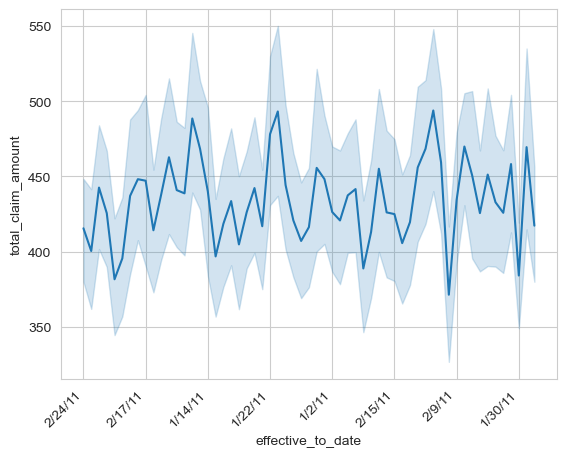

In [30]:
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

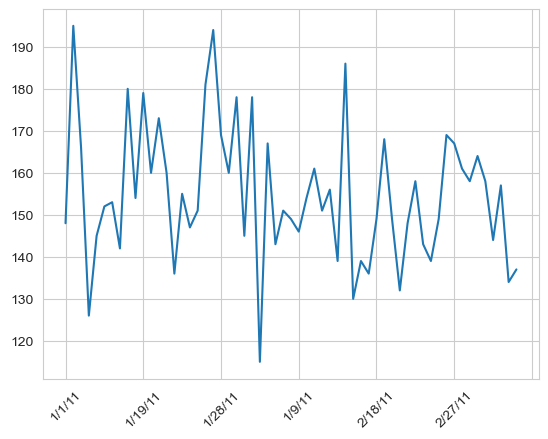

In [31]:
uniquecounts = customer_df['effective_to_date'].value_counts().sort_index() ###prompts Seaborn to produce a line plot with the counts of all unique values occuring on a singular date, with sort.index() sorting the count by index (in this case, the date)
sns.lineplot(x=uniquecounts.index, y=uniquecounts.values)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

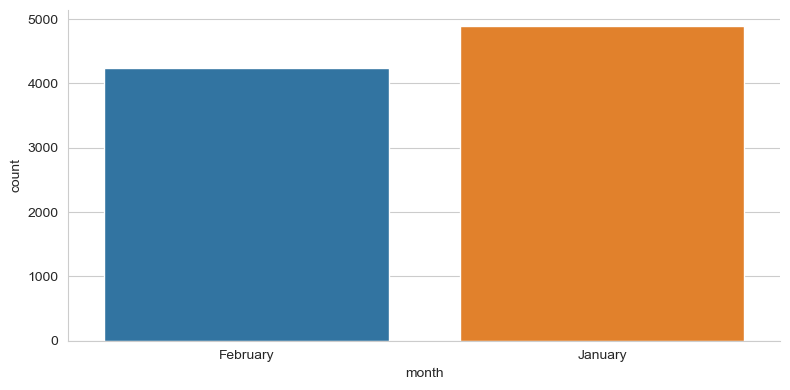

In [32]:
customer_df['month'] = pd.to_datetime(customer_df['effective_to_date']).dt.month_name() ###creating a new column by extracting only the month from the date
sns.catplot(x='month', kind='count', data=customer_df, height=4, aspect=2)


###Looks like a regular seaborn countplot since only two months are present in the data set


In [33]:
100-((4898+4263)/100) ###percentage difference in number of insurance policies between the two months

8.39

**`Observation`**: The sum of insurance policies taken out in January are 8.39% higher than in February

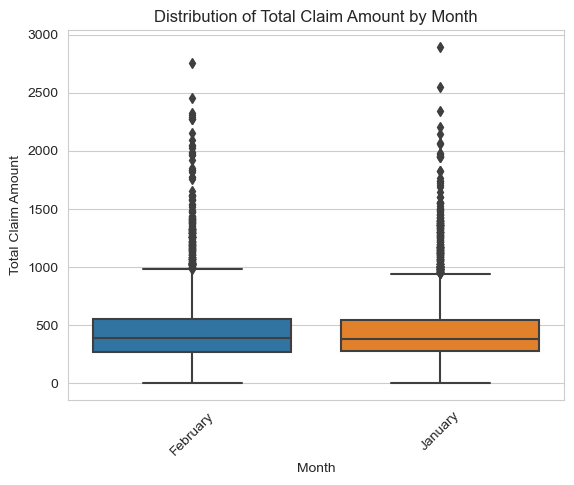

In [34]:
sns.boxplot(x='month', y='total_claim_amount', data=customer_df)
plt.title('Distribution of Total Claim Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(2)) ###because there are only two months
plt.show()

**`Observation`**: When the month of all of the effective_to_date(s) are plotted against total_claim_amount, we can observe that there is not much variation between both months. Therefore, we can drop the date column as it has little impact on the model.

In [35]:
customer_df.info() ###double checking remaining columns

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   coverage                       9134 non-null   object 
 2   education                      9134 non-null   object 
 3   effective_to_date              9134 non-null   object 
 4   employmentstatus               9134 non-null   object 
 5   income                         9134 non-null   int64  
 6   location_code                  9134 non-null   object 
 7   marital_status                 9134 non-null   object 
 8   monthly_premium_auto           9134 non-null   int64  
 9   months_since_last_claim        9134 non-null   int64  
 10  months_since_policy_inception  9134 non-null   int64  
 11  number_of_open_complaints      9134 non-null   int64  
 12  number_of_policies             9134 non-null

In [36]:
customer_df = customer_df.drop('effective_to_date', axis=1) ###dropped effective_to_date from data frame

In [37]:
customer_df.head()

,customer_lifetime_value,coverage,education,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,total_claim_amount,vehicle_class,vehicle_size,month
Customer,,,,,,,,,,,,,,,,,
BU79786,2763.519279,Basic,Undergraduate education,Employed,56274,Suburban,Married or Divorced,69,32,5,0,1,Corporate L3,384.811147,Luxury,Medsize,February
QZ44356,6979.535903,Extended,Undergraduate education,Unemployed,0,Suburban,Single,94,13,42,0,8,Personal L3,1131.464935,Luxury,Medsize,January
AI49188,12887.431650,Premium,Undergraduate education,Employed,48767,Suburban,Married or Divorced,108,18,38,0,2,Personal L3,566.472247,Luxury,Medsize,February
WW63253,7645.861827,Basic,Undergraduate education,Unemployed,0,Suburban,Married or Divorced,106,18,65,0,7,Corporate L2,529.881344,Sports,Medsize,January
HB64268,2813.692575,Basic,Undergraduate education,Employed,43836,Rural,Single,73,12,44,0,1,Personal L1,138.130879,Luxury,Medsize,February


In [38]:
##Data Cleaning and Wrangling

In [39]:
###1.We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

**`Function for Removing Outliers`**

In [40]:
 
def remove_outliers_iqr(col):  ### had to remove the multiplier because the code wouldn't run....will ask camille about this on sat
    q1 = col.quantile(0.25) 
    q3 = col.quantile(0.75) 
    iqr = q3 - q1 
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr) 
    return col[(col > lower_bound) & (col < upper_bound)]

**`Applying IQR function to dataframe`**

In [41]:
customer_df_copy = customer_df.copy()

In [42]:
for col in customer_df_copy.select_dtypes(include=np.number).columns:
    customer_df_copy[col] = remove_outliers_iqr(customer_df_copy[col])



**`Visualizing the outlier removal`**

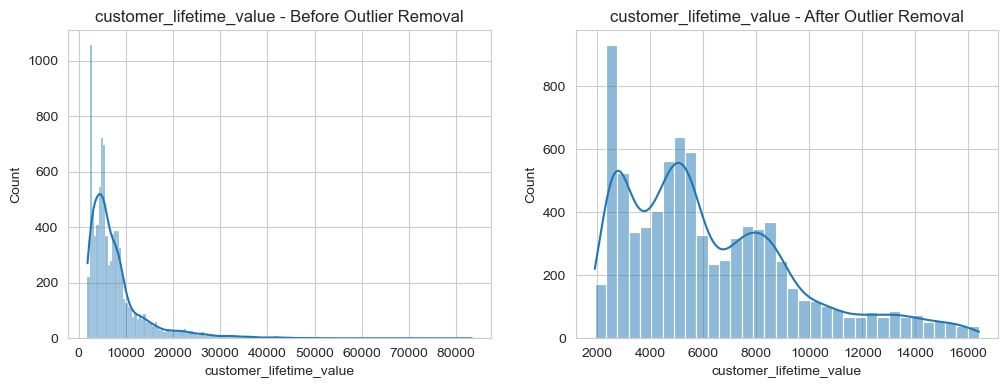

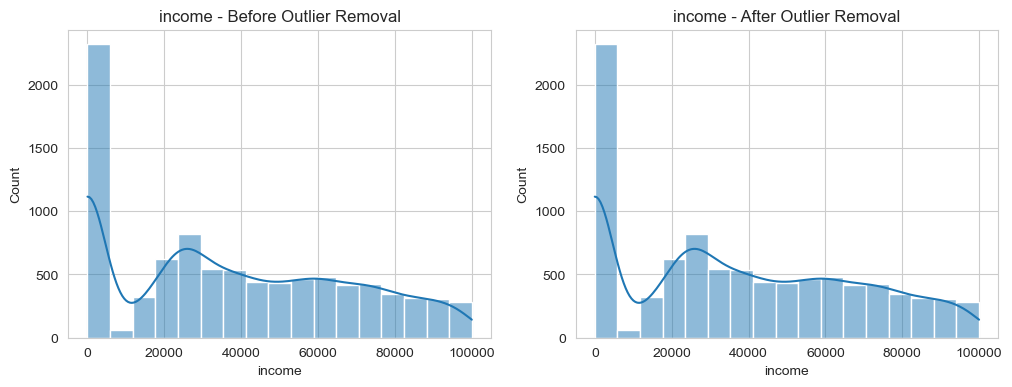

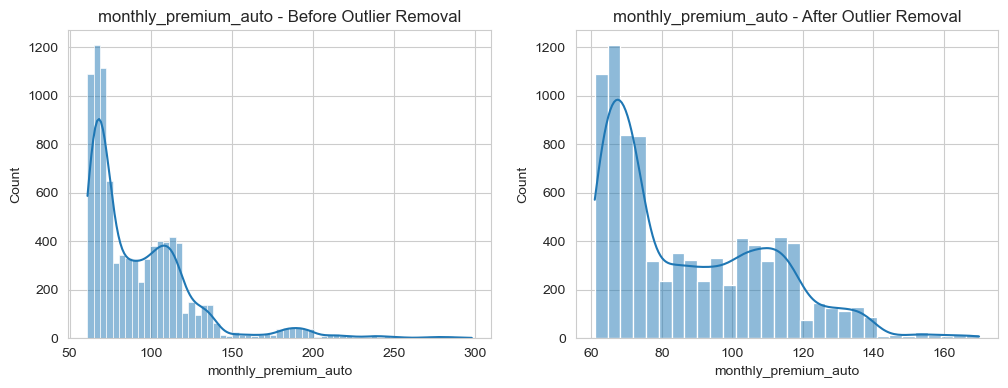

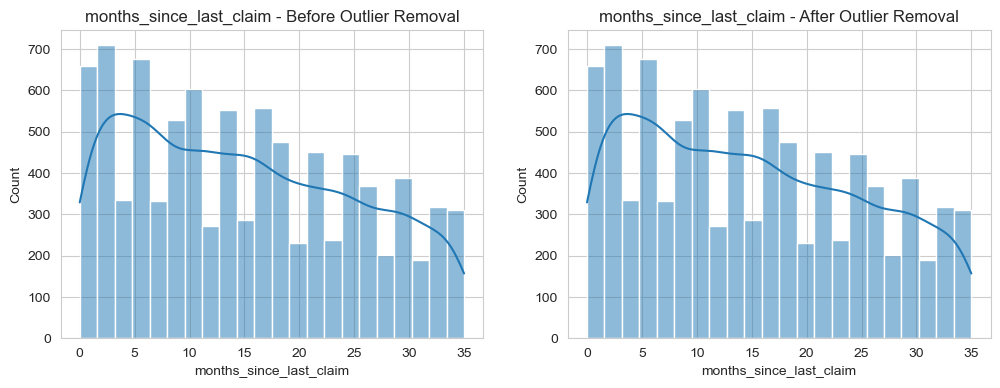

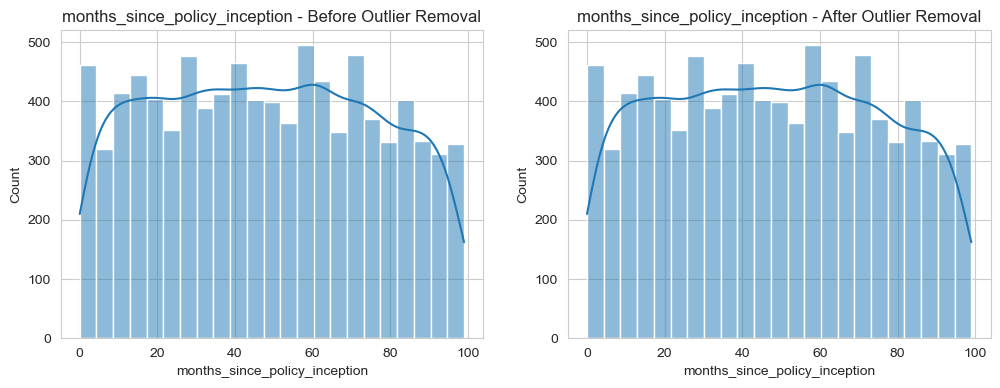

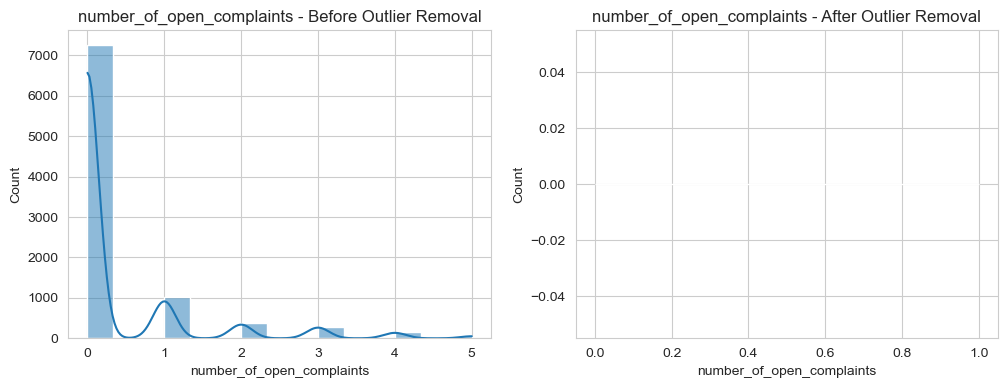

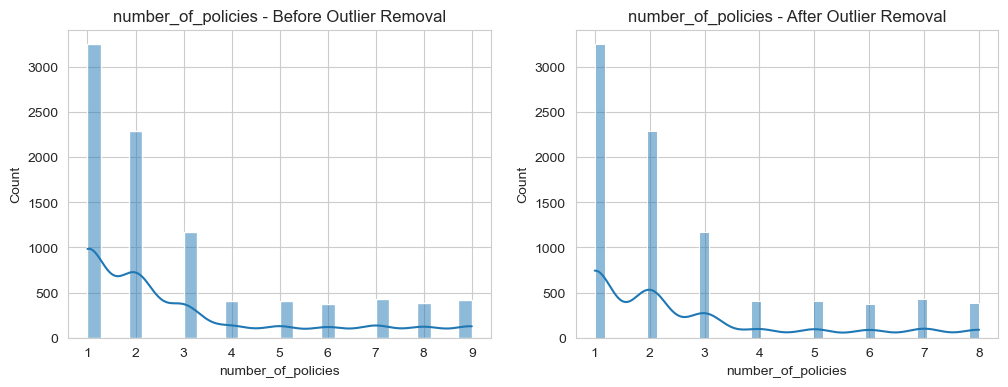

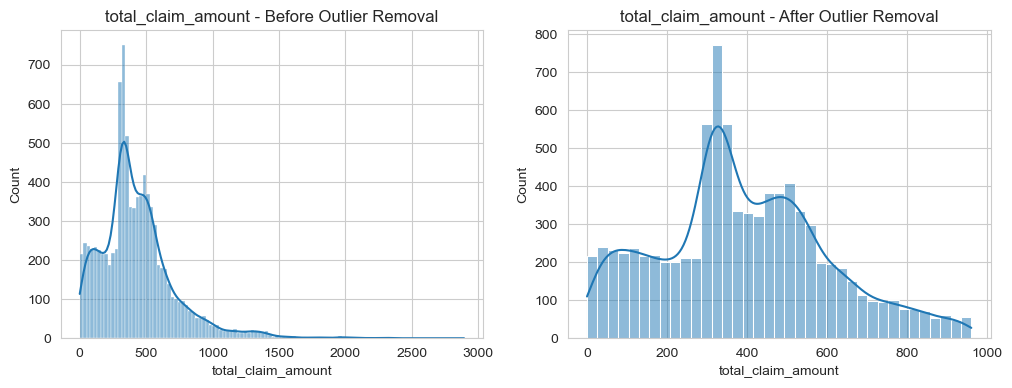

In [43]:
customer_df_copy = customer_df.copy() ##in case I screw the original data frame up
# Loop through all numerical columns
for col in customer_df_copy.select_dtypes(include=np.number).columns:
    
    # Plot distribution before outlier removal
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(customer_df_copy[col], kde=True) ###the kde needs to be set to 'True' so that the distribution curve is visible
    plt.title(col + " - Before Outlier Removal")
    
    # Apply outlier removal function and plot distribution after removal
    customer_df_copy[col] = remove_outliers_iqr(customer_df_copy[col])
    plt.subplot(1, 2, 2)
    sns.histplot(customer_df_copy[col], kde=True)
    plt.title(col + " - After Outlier Removal")

# Show the plot
plt.show()

In [44]:
###2.Create a copy of the dataframe for the data wrangling.

**`Done and Dusted`**

In [45]:
###3.Normalize the continuous variables. You can use any one method you want.

**`Observation`**: Log transformation is more suitable in this context as the variables are highly skewed and/or have long tails (see above distribution plots). Min-max is more suited to data sets where the relative values and relationships with other variables are not as important as the absolute values of the variables themselves.

In [46]:
num_cols = customer_df_copy.select_dtypes(include=np.number).columns


In [47]:
customer_df_copy.index = pd.to_numeric(customer_df_copy.index, errors='coerce')

In [48]:
customer_df_copy[num_cols] = np.log(customer_df_copy[num_cols])

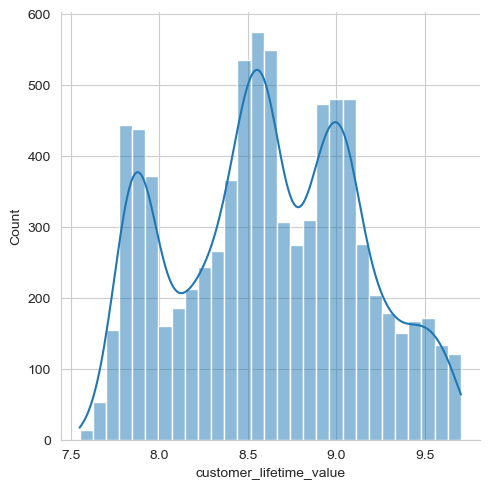

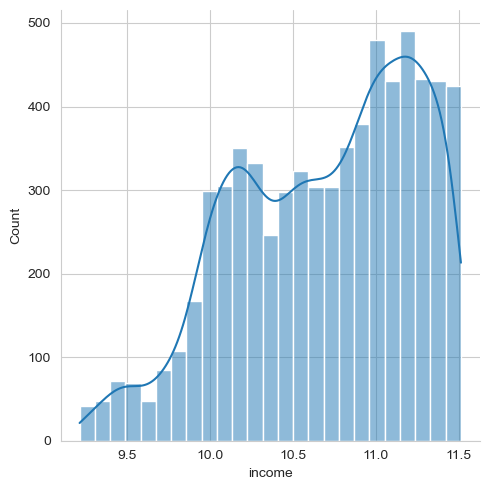

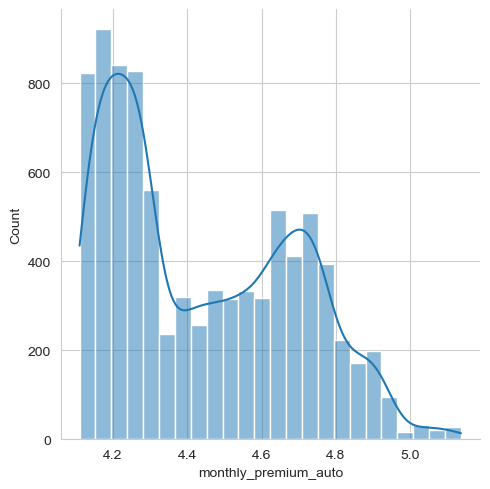

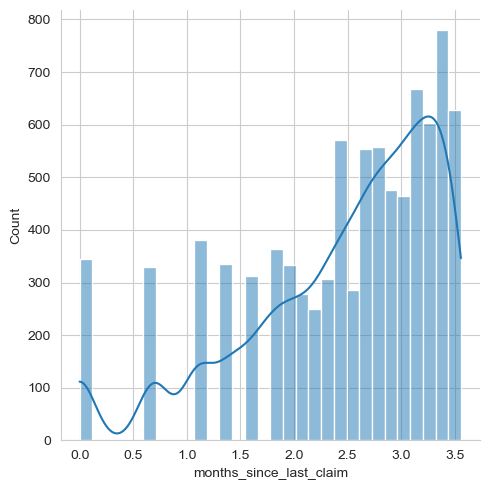

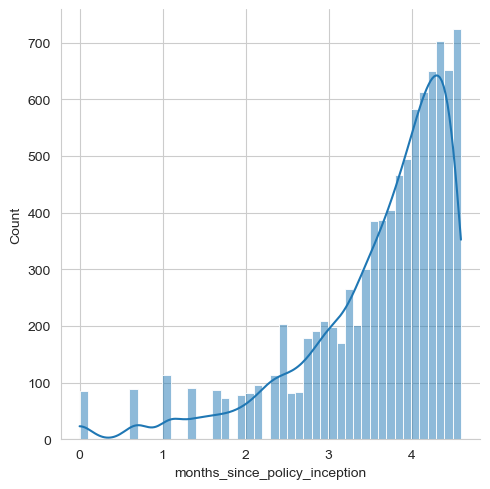

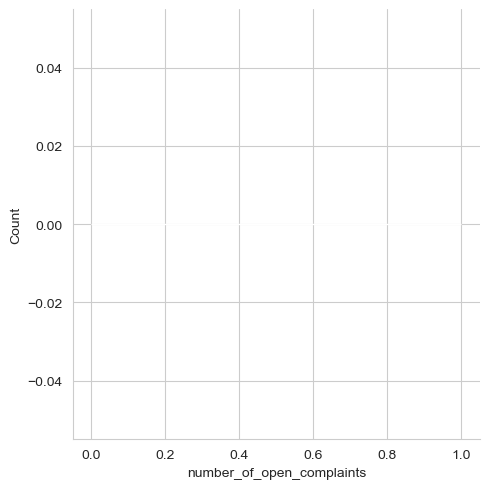

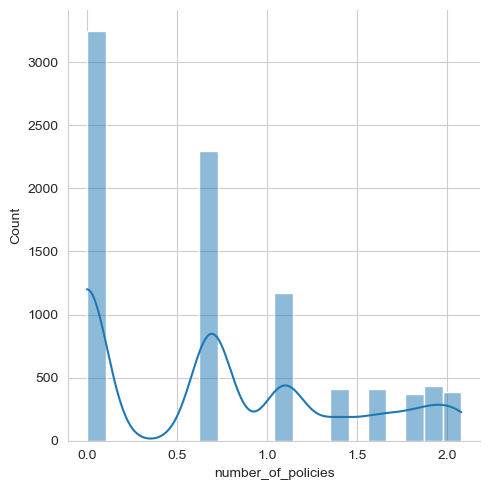

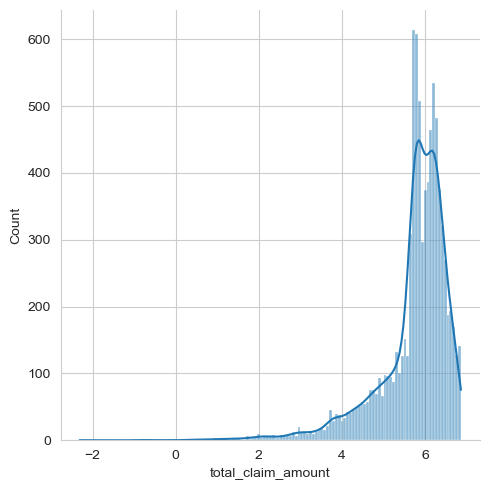

In [49]:
for column in num_cols:
    sns.displot(customer_df_copy[column], kde=True)
plt.show()

**`Observation`**: But for some reason the distribution came out all wonky, so I will try using minmax to cover all my bases

In [50]:
customer_df_copy2 = customer_df.copy()

In [51]:
customer_df_copy2.index = pd.to_numeric(customer_df_copy.index, errors='coerce')

In [52]:
data_obj=customer_df_copy2.select_dtypes(np.object)
data_obj

,coverage,education,employmentstatus,location_code,marital_status,policy,vehicle_class,vehicle_size,month
Customer,,,,,,,,,
NaN,Basic,Undergraduate education,Employed,Suburban,Married or Divorced,Corporate L3,Luxury,Medsize,February
NaN,Extended,Undergraduate education,Unemployed,Suburban,Single,Personal L3,Luxury,Medsize,January
NaN,Premium,Undergraduate education,Employed,Suburban,Married or Divorced,Personal L3,Luxury,Medsize,February
NaN,Basic,Undergraduate education,Unemployed,Suburban,Married or Divorced,Corporate L2,Sports,Medsize,January
NaN,Basic,Undergraduate education,Employed,Rural,Single,Personal L1,Luxury,Medsize,February
...,...,...,...,...,...,...,...,...,...
NaN,Basic,Undergraduate education,Employed,Urban,Married or Divorced,Personal L1,Luxury,Medsize,February
NaN,Extended,Undergraduate education,Employed,Suburban,Married or Divorced,Corporate L3,Luxury,Medsize,February
NaN,Extended,Undergraduate education,Unemployed,Suburban,Single,Corporate L2,Luxury,Medsize,February


In [54]:
data_obj1= pd.get_dummies(data_obj, drop_first=True)
data_obj1


,coverage_Extended,coverage_Premium,education_Postgraduate education,education_Undergraduate education,employmentstatus_Other,employmentstatus_Unemployed,location_code_Suburban,location_code_Urban,marital_status_Single,policy_Corporate L2,...,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,vehicle_class_Sports,vehicle_size_Medsize,vehicle_size_Small,month_January
Customer,,,,,,,,,,,,,,,,,,,,,
NaN,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,0,0,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
NaN,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
NaN,0,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,1,0,1
NaN,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
NaN,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,0,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [55]:
y = customer_df_copy2["total_claim_amount"]
X = customer_df_copy2.drop(['total_claim_amount'],axis=1)
X.head()

,customer_lifetime_value,coverage,education,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,vehicle_class,vehicle_size,month
Customer,,,,,,,,,,,,,,,,
NaN,2763.519279,Basic,Undergraduate education,Employed,56274,Suburban,Married or Divorced,69,32,5,0,1,Corporate L3,Luxury,Medsize,February
NaN,6979.535903,Extended,Undergraduate education,Unemployed,0,Suburban,Single,94,13,42,0,8,Personal L3,Luxury,Medsize,January
NaN,12887.431650,Premium,Undergraduate education,Employed,48767,Suburban,Married or Divorced,108,18,38,0,2,Personal L3,Luxury,Medsize,February
NaN,7645.861827,Basic,Undergraduate education,Unemployed,0,Suburban,Married or Divorced,106,18,65,0,7,Corporate L2,Sports,Medsize,January
NaN,2813.692575,Basic,Undergraduate education,Employed,43836,Rural,Single,73,12,44,0,1,Personal L1,Luxury,Medsize,February


In [56]:
num_cols= customer_df_copy2[num_cols].reset_index() ###python refuses to scale the index, so the index has to go

In [57]:
transformer= MinMaxScaler().fit(num_cols)
data_minmax= transformer.transform(num_cols)
print(data_minmax.shape)

(9134, 9)


In [58]:
concat_data= np.concatenate((data_obj1, data_minmax), axis=1)
concat_data


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.13297388],
       [1.        , 0.        , 0.        , ..., 0.        , 0.875     ,
        0.39105113],
       [0.        , 1.        , 0.        , ..., 0.        , 0.125     ,
        0.19576416],
       ...,
       [1.        , 0.        , 0.        , ..., 0.6       , 0.125     ,
        0.27329676],
       [1.        , 0.        , 0.        , ..., 0.        , 0.25      ,
        0.2388757 ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.12771622]])

In [59]:
concat_data= pd.DataFrame(concat_data)
concat_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,NaN,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,NaN,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,NaN,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,NaN,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NaN,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,NaN,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,NaN,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,NaN,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


In [60]:
concat_data.columns=['coverage_Extended', 'coverage_Premium',
       'education_Postgraduate education',
       'education_Undergraduate education', 'employmentstatus_Other',
       'employmentstatus_Unemployed', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Single',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', 'vehicle_class_Sports',
       'vehicle_size_Medsize', 'vehicle_size_Small', 'month_January',
       'Customer', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount']

In [61]:
concat_data.head()

,coverage_Extended,coverage_Premium,education_Postgraduate education,education_Undergraduate education,employmentstatus_Other,employmentstatus_Unemployed,location_code_Suburban,location_code_Urban,marital_status_Single,policy_Corporate L2,...,month_January,Customer,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,NaN,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,NaN,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,NaN,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,NaN,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


In [62]:
concat_data.info()  ### checking if all values are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   coverage_Extended                  9134 non-null   float64
 1   coverage_Premium                   9134 non-null   float64
 2   education_Postgraduate education   9134 non-null   float64
 3   education_Undergraduate education  9134 non-null   float64
 4   employmentstatus_Other             9134 non-null   float64
 5   employmentstatus_Unemployed        9134 non-null   float64
 6   location_code_Suburban             9134 non-null   float64
 7   location_code_Urban                9134 non-null   float64
 8   marital_status_Single              9134 non-null   float64
 9   policy_Corporate L2                9134 non-null   float64
 10  policy_Corporate L3                9134 non-null   float64
 11  policy_Personal L1                 9134 non-null   float

In [63]:
concat_data= concat_data.drop('Customer', axis=1)

In [64]:
concat_data.columns.values

array(['coverage_Extended', 'coverage_Premium',
       'education_Postgraduate education',
       'education_Undergraduate education', 'employmentstatus_Other',
       'employmentstatus_Unemployed', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Single',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', 'vehicle_class_Sports',
       'vehicle_size_Medsize', 'vehicle_size_Small', 'month_January',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'], dtype=object)

**'Lab | Comparing regression models'**

In [65]:
###1.In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [66]:
X= concat_data.drop(['total_claim_amount'], axis = 1)

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   coverage_Extended                  9134 non-null   float64
 1   coverage_Premium                   9134 non-null   float64
 2   education_Postgraduate education   9134 non-null   float64
 3   education_Undergraduate education  9134 non-null   float64
 4   employmentstatus_Other             9134 non-null   float64
 5   employmentstatus_Unemployed        9134 non-null   float64
 6   location_code_Suburban             9134 non-null   float64
 7   location_code_Urban                9134 non-null   float64
 8   marital_status_Single              9134 non-null   float64
 9   policy_Corporate L2                9134 non-null   float64
 10  policy_Corporate L3                9134 non-null   float64
 11  policy_Personal L1                 9134 non-null   float

In [68]:
y= concat_data['total_claim_amount']

In [69]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: total_claim_amount
Non-Null Count  Dtype  
--------------  -----  
9134 non-null   float64
dtypes: float64(1)
memory usage: 71.5 KB


**`Train-test Split`**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
len(X_train)

6393

In [72]:
len(y_train)

6393

In [73]:
len(X_test)

2741

In [74]:
len(y_test)

2741

In [75]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [76]:
predictions= model.predict(X_test)
predictions

array([0.05670293, 0.16278088, 0.16541531, ..., 0.23011293, 0.03903627,
       0.19040376])

In [77]:
#checking different accuracy metrics
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  0.76620591263648
RMSE =  0.04775112087108199
The value of the metric MSE is  0.0022801695444446823
MAE =  0.032821568977706495


**'Observation'**: At ab r2 score of 0.76, the model is performing fairly well at explaining the the variations in total_claim _amount, although there is always room for improvement

In [ ]:
###2.Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [92]:
def train_test_models(models, X, y, test_size=0.2, random_state=42):
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
     model_scores = {}
     for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        model_scores[type(model).__name__] = score

     return model_scores

In [93]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor   ###the necessary libraries

In [94]:
models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor(), LinearRegression(normalize=True)]

In [95]:
model_scores = train_test_models(models, X, y)

In [96]:
for model, score in model_scores.items():
    print(f"{model}: {score:.3f}")

LinearRegression: 0.763
KNeighborsRegressor: 0.591
MLPRegressor: 0.745


**`Discussion`**: The linear regression model performs the best out of all three, which means the assumption that (at least a large part) of the relationship between the independent and dependent variables is linear. The KNN is mostly used for classification, which in this context does not correspond with the total_claim_amount (y), which is a continuous variable. The MLPRegressor harnesses the power of neural networks in order to perform nonlinear transformations on complex nonlinear realationships between the independent and dependent variables, which in this case, is probably not.